In [1]:
from google.colab import files
datafiles = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [0]:
import pandas as pd

In [0]:
article = pd.read_csv('NDTV_Feb13_article.csv')

In [4]:
article

,0
0,['New Delhi:Reacting to Samajwadi Party founde...
1,['New Delhi:Tackling a contradiction that has ...
2,"['New Delhi:Prime Minister Narendra Modi, deli..."
3,"['New Delhi:A restaurant owner in Karnataka, a..."
4,"['New Delhi:Highlights""Mulayam Singhji has giv..."
5,['New Delhi:West Bengal Chief Minister Mamata ...
6,['New Delhi:Collaborative editing may be one o...
7,['Yavatmal (Maharashtra):A crowd thrashed Arni...
8,['New Delhi:HighlightsCAG report does not incl...
9,['Chennai/New Delhi:The BJP\'s tie-up with the...


In [0]:
import seaborn as sns
import spacy
from wordcloud import WordCloud
import re

In [0]:
import nltk

In [0]:
article.columns = ['text']

In [0]:
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# function to clean text data
def clean_reviews(reviews):
    reviews = [replace_1.sub("", line.lower()) for line in reviews]
    reviews = [replace_2.sub(" ", line) for line in reviews]
    return reviews

In [0]:
article['text'] = clean_reviews(article['text'])

In [10]:
article.head()

,text
0,new delhireacting to samajwadi party founder m...
1,new delhitackling a contradiction that has lon...
2,new delhiprime minister narendra modi deliveri...
3,new delhia restaurant owner in karnataka an ar...
4,new delhihighlightsmulayam singhji has given h...


In [0]:
from nltk import FreqDist
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [0]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


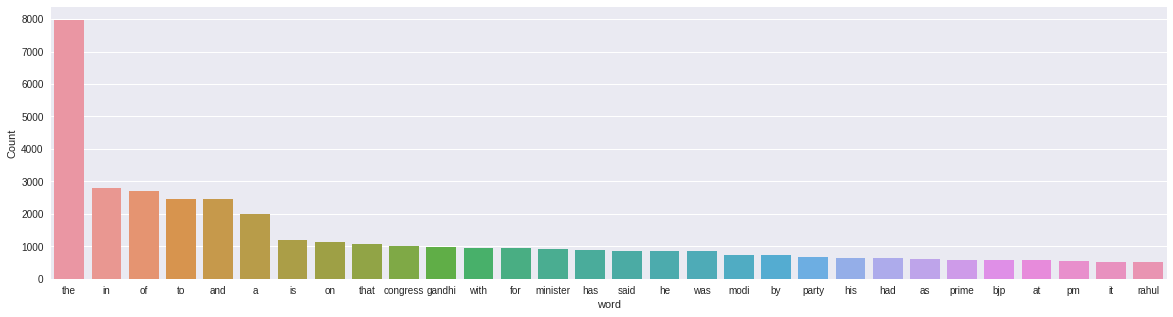

In [13]:
freq_words(article['text'])

In [0]:

nlp = spacy.load('en_core_web_sm')

#excluding key stopwords to maintain the semantics of the text 
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False

In [0]:
def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [16]:
article['tokenized_news'] = tokenization(article['text'])

100%|██████████| 297/297 [00:41<00:00,  7.00it/s]


In [0]:
#function to remove STOPWORDS:
def strip_stopwords(reviews):
    s = []
    for r in tqdm(reviews):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

In [18]:
article['news_cleaned'] = strip_stopwords(article['tokenized_news'])

100%|██████████| 297/297 [00:00<00:00, 1709.15it/s]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


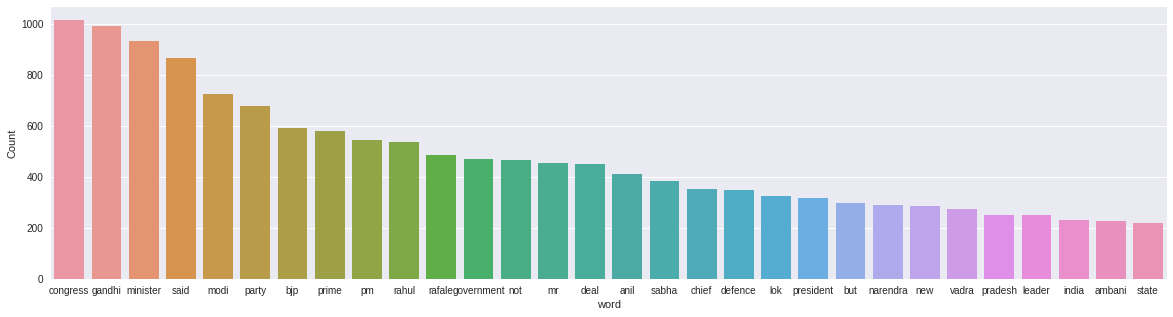

In [19]:
freq_words(article['news_cleaned'])

In [0]:
article['news_cleaned'] = article['news_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


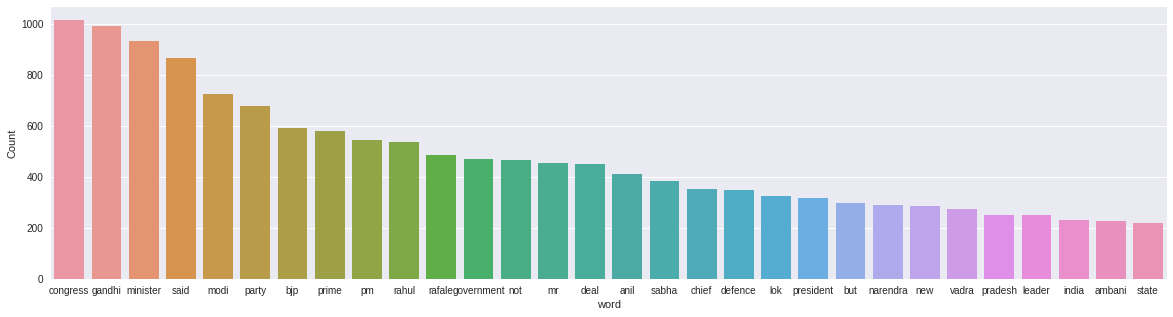

In [21]:
freq_words(article['news_cleaned'])

In [22]:
news=article['text'].copy()

news.head()

0    new delhireacting to samajwadi party founder m...
1    new delhitackling a contradiction that has lon...
2    new delhiprime minister narendra modi deliveri...
3    new delhia restaurant owner in karnataka an ar...
4    new delhihighlightsmulayam singhji has given h...
Name: text, dtype: object

In [0]:
tokenize_pattern = "[A-Za-z-']+"

tokenizer = nltk.tokenize.RegexpTokenizer(pattern=tokenize_pattern)
news_tokens = [tokenizer.tokenize(rev.lower()) for rev in news]

In [0]:
from collections import Counter 
from wordcloud import STOPWORDS

In [0]:
for rev in news_tokens:
    for w in STOPWORDS:
        while True:
            try:
                rev.remove(w)
            except:
                break

In [0]:
news_token_all = [w for rev in news_tokens for w in rev]

In [27]:
len(news_token_all)

72219

In [0]:
word_count = Counter(news_token_all)

In [29]:
word_count.most_common(50)

[('s', 1345),
 ('gandhi', 1123),
 ('congress', 1058),
 ('minister', 1000),
 ('said', 870),
 ('modi', 808),
 ('party', 767),
 ('bjp', 658),
 ('prime', 580),
 ('pm', 554),
 ('rahul', 545),
 ('government', 485),
 ('rafale', 484),
 ('mr', 462),
 ('will', 450),
 ('deal', 448),
 ('anil', 410),
 ('n', 398),
 ('sabha', 385),
 ('ambani', 362),
 ('chief', 352),
 ('defence', 346),
 ('president', 326),
 ('vadra', 326),
 ('lok', 323),
 ('narendra', 288),
 ('new', 285),
 ('india', 264),
 ('pradesh', 262),
 ('yadav', 259),
 ('leader', 248),
 ('today', 238),
 ('priyanka', 224),
 ('state', 220),
 ('national', 218),
 ('last', 212),
 ('uttar', 208),
 ('report', 202),
 ('leaders', 201),
 ('opposition', 199),
 ('country', 196),
 ('alliance', 166),
 ('says', 164),
 ('banerjee', 158),
 ('one', 155),
 ('time', 152),
 ('general', 152),
 ('singh', 151),
 ('corruption', 150),
 ('day', 148)]

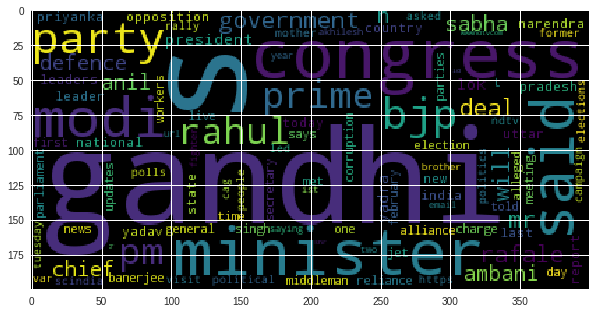

In [30]:
wc = WordCloud(max_words=100)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(word_count))

In [0]:
tokenize_pattern = "[A-Za-z-']+"

tokenizer = nltk.tokenize.RegexpTokenizer(pattern=tokenize_pattern)
clean_news_tokens = [tokenizer.tokenize(rev.lower()) for rev in news]

In [0]:
clean_news_token_all = [w for rev in clean_news_tokens for w in rev]

In [33]:
len(clean_news_token_all)

118156

In [34]:
news_count = Counter(clean_news_token_all)
news_count.most_common(50)

[('the', 8021),
 ('in', 2788),
 ('of', 2690),
 ('to', 2461),
 ('and', 2456),
 ('a', 2010),
 ('s', 1345),
 ('is', 1186),
 ('on', 1128),
 ('gandhi', 1123),
 ('that', 1078),
 ('congress', 1058),
 ('minister', 1000),
 ('with', 937),
 ('for', 936),
 ('has', 873),
 ('said', 870),
 ('he', 863),
 ('was', 846),
 ('modi', 808),
 ('party', 767),
 ('by', 723),
 ('bjp', 658),
 ('his', 654),
 ('had', 653),
 ('as', 618),
 ('prime', 580),
 ('at', 565),
 ('pm', 554),
 ('rahul', 545),
 ('it', 536),
 ('an', 507),
 ('government', 485),
 ('have', 484),
 ('rafale', 484),
 ('been', 472),
 ('mr', 462),
 ('will', 450),
 ('deal', 448),
 ('this', 425),
 ('not', 418),
 ('anil', 410),
 ('who', 403),
 ('n', 398),
 ('after', 394),
 ('sabha', 385),
 ('be', 380),
 ('her', 368),
 ('ambani', 362),
 ('chief', 352)]

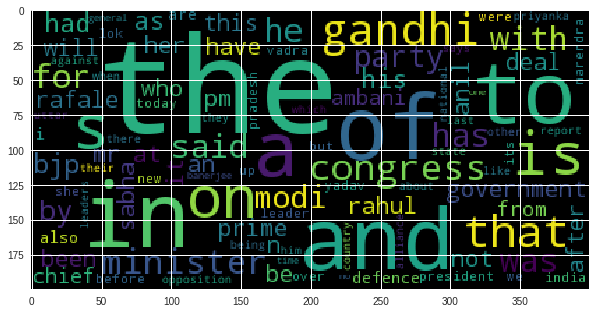

In [35]:
nc = WordCloud(max_words=100)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(news_count))

In [0]:
import gensim

In [0]:
only_reviews = article.text

In [0]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews]

In [0]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [0]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]

In [0]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [0]:
dictionaries.filter_extremes(no_below=10)

In [43]:
len(list(dictionaries))

1060

In [44]:
ls

NDTV_Feb13_article.csv  sample_data/


In [0]:
dictionaries.save("TEXTA.dict")

In [46]:
ls

NDTV_Feb13_article.csv  sample_data/  TEXTA.dict


In [0]:
news_corpora = [dictionaries.doc2bow(t) for t in tokens]

In [0]:
gensim.corpora.MmCorpus.serialize("TEXTA.dict",
                                  news_corpora)

In [0]:
tfidf_news = gensim.models.TfidfModel(news_corpora)
tfidf_corpus = tfidf_news[news_corpora]

In [0]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 10, id2word= dictionaries)

In [51]:
lsi_model.print_topics(num_topics=25)

[(0,
  '0.196*"deal" + 0.193*"rafale" + 0.188*"ambani" + 0.172*"anil" + 0.170*"report" + 0.148*"defence" + 0.141*"vadra" + 0.126*"yadav" + 0.121*"cag" + 0.118*"priyanka"'),
 (1,
  '0.220*"ambani" + 0.204*"rafale" + 0.201*"deal" + 0.200*"anil" + 0.198*"report" + -0.183*"vadra" + 0.161*"defence" + -0.151*"priyanka" + -0.149*"yadav" + 0.144*"cag"'),
 (2,
  '0.280*"hug" + 0.242*"yadav" + 0.228*"hate" + -0.216*"vadra" + 0.177*"mulayam" + 0.160*"don" + -0.138*"enforcement" + 0.127*"hugging" + 0.126*"comment" + -0.123*"directorate"'),
 (3,
  '-0.376*"banerjee" + 0.312*"yadav" + -0.234*"bengal" + 0.233*"mulayam" + 0.163*"samajwadi" + -0.139*"mamata" + 0.133*"comment" + -0.120*"ms" + 0.120*"priyanka" + -0.116*"trinamool"'),
 (4,
  '0.308*"hug" + -0.260*"yadav" + 0.249*"hate" + -0.232*"banerjee" + -0.167*"mulayam" + -0.166*"aap" + 0.158*"don" + 0.139*"hugging" + -0.130*"bengal" + 0.126*"scindia"'),
 (5,
  '0.292*"n" + -0.230*"report" + -0.169*"cag" + 0.142*"anil" + 0.135*"updates" + 0.127*"var" 